In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 실물 지표 계산을 위한 신용카드사용액, 전산업생산지수, 소매판매액 z-score 계산 데이터 불러오기
df_credit = pd.read_csv('new_data/new_data_z_score/신용카드_Z_Score_2005_2026.csv', index_col='date', parse_dates=True)
df_production = pd.read_csv('new_data/new_data_z_score/Production_Index_Z_Score.csv', index_col='날짜', parse_dates=True)
df_retail = pd.read_csv('new_data/new_data_z_score/new_Retail_Sales_Z_Score.csv', index_col='날짜', parse_dates=True)

In [5]:
# 데이터 통합
combined_fin = df_credit[['z_score']].rename(columns={'z_score': 'credit_spread'}).join(
    df_production[['z_score']].rename(columns={'z_score': 'industrial_production'}), how='inner').join(
    df_retail[['z_score']].rename(columns={'z_score': 'retail_sales'}), how='inner')

In [6]:
# 실물 지표 계산(평균)
combined_fin['real_index'] = combined_fin.mean(axis=1)

In [7]:
# 형식 맞추기 및 저장
final_real_output = combined_fin.reset_index().rename(columns={'index': 'date'})
final_real_output = final_real_output.dropna() # 초기 12개월분 제외

final_real_output.to_csv('new_data/실물지표계산.csv', index=True, encoding='utf-8-sig')
print("실물 종합지표 파일이 'new_data/실물지표계산.csv'로 저장되었습니다.")

실물 종합지표 파일이 'new_data/실물지표계산.csv'로 저장되었습니다.


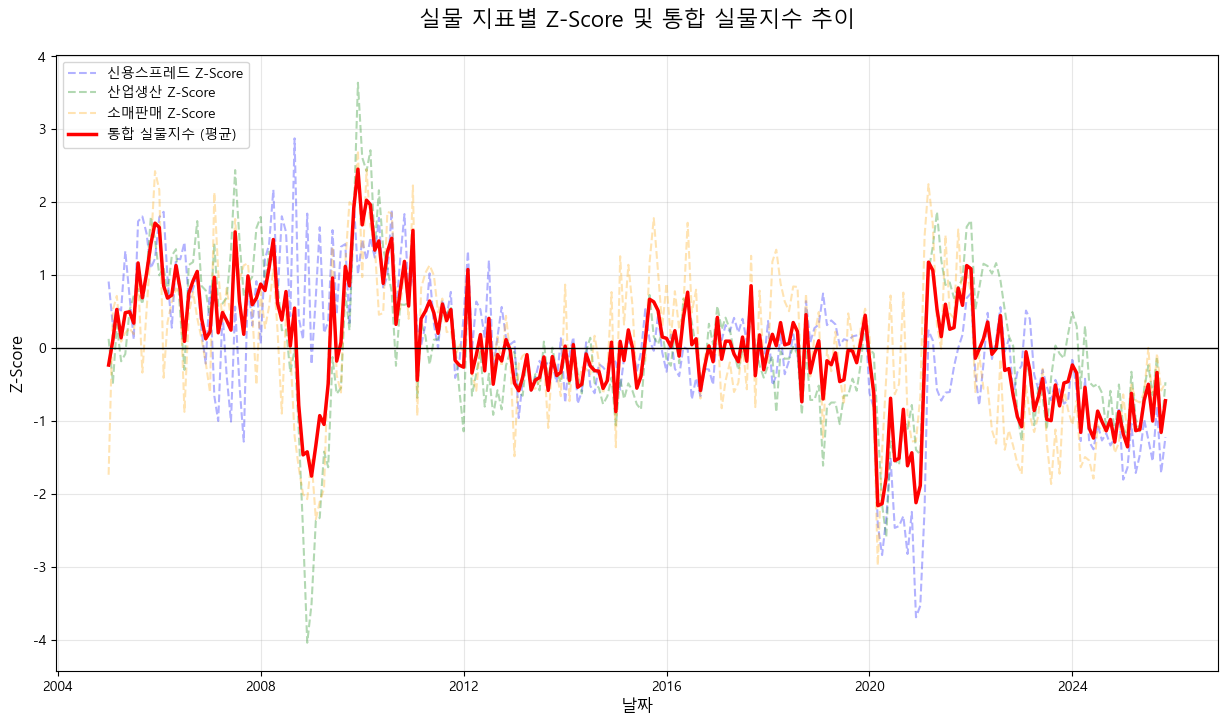

In [8]:
# 시각화
# 한글 폰트 설정 (환경에 따라 필요시 설정)
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows용
# plt.rcParams['font.family'] = 'AppleGothic' # Mac용
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 8))

# 개별 지표들 (Credit Spread, KOSPI, Exchange) 흐릿하게 출력
plt.plot(combined_fin.index, combined_fin['credit_spread'], label='신용스프레드 Z-Score', color='blue', alpha=0.3, linestyle='--')
plt.plot(combined_fin.index, combined_fin['industrial_production'], label='산업생산 Z-Score', color='green', alpha=0.3, linestyle='--')
plt.plot(combined_fin.index, combined_fin['retail_sales'], label='소매판매 Z-Score', color='orange', alpha=0.3, linestyle='--')

# 통합 금융 지수 (fin_index)
plt.plot(combined_fin.index, combined_fin['real_index'], label='통합 실물지수 (평균)', color='red', linewidth=2.5)

# 기준선 (Z-score = 0) 추가
plt.axhline(0, color='black', linewidth=1, linestyle='-')

# 차트 꾸미기
plt.title('실물 지표별 Z-Score 및 통합 실물지수 추이', fontsize=16, pad=20)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('Z-Score', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

plt.show()